In [1]:
%pylab inline
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
# if xarray doesn't work, may need to upgrade it 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Define Class

In [57]:
class UHI_Graphs: 
    def __init__(self, Folder, FileName):
        self.Folder = Folder 
        self.FileName = FileName 
    
    def Open(self):
        nc = xr.open_dataset('D:\yello\Documents\Lab_UIUC' + "\\" + self.Folder + "\\" + self.FileName)
        return nc
    
    def Graph(self, nc, variable, cmap='bwr', UHI=False, letter='', save=False, set_colorbar=False): 
        fig, axes = plt.subplots(figsize=(20,10))
        
        ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
        ax.set_global()
        
        if UHI == True: 
            var = input("Variable?")
            urban_var = var + '_U'
            rural_var = var + '_R'
            plot_var = nc[urban_var] - nc[rural_var]
            
            if set_colorbar==False:
                vmin = (nc[urban_var] - nc[rural_var]).min()
                vmax = (nc[urban_var] - nc[rural_var]).max()
            else: 
                vmin = float(input("vmin?"))
                vmax = float(input("vmax?"))
                
        else:
            plot_var = nc[variable]
        
            if set_colorbar==False:
                vmin = nc[variable].min()
                vmax = nc[variable].max()
            else: 
                vmin = float(input("vmin?"))
                vmax = float(input("vmax?"))

        plot_var.squeeze().plot(transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax)
        
        title = input("Title?")
        additional_notes = input("Additional Notes?")
        plt.title(title + '\n' + additional_notes, fontsize=20)
        ax.coastlines()
        
        date = input("Date?")

        #plt.colorbar(fraction=0.046, pad=0.04)
        if save == True:
            plt.savefig('D:\yello\Documents\Lab_UIUC' + "\\" + self.Folder + "\\" + variable + '_' + date + letter)
        

## Graphs

Variable?TSA
vmin?-3.5
vmax?3.5
Title?2m Air Temperature (TSA) - UHI
Additional Notes?Jan 2010
Date?012010


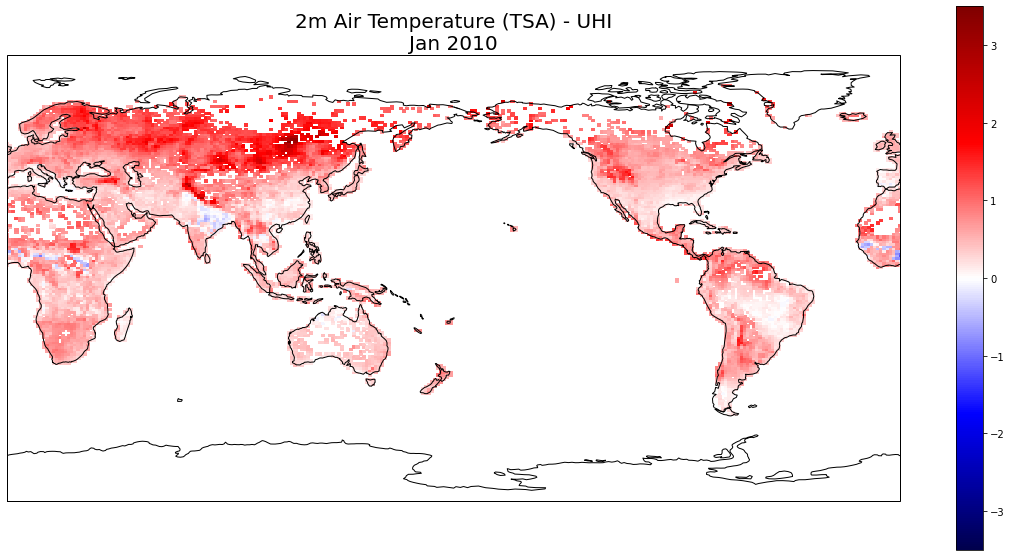

In [63]:
# TSA UHI - Jan 2010
# initiate class
TSA_UHI = UHI_Graphs('Practice_3.8.2020', 'clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-01.nc')

# import file as an xarray dataset 
nc = TSA_UHI.Open()

# make graph 
# save = True if want to save 
# letter is added on to the end of the file name to differentiate 
# if UHI true will calculate UHI for given variable 
# do set_colorbar=False to see where the natural bounds are 
# then set vmax=-vmin to center at 0 and to set your own bounds 
UHI_Graphs.Graph(TSA_UHI, nc, 'TSA_UHI', UHI=True, cmap='seismic', save = True, set_colorbar=True)

Variable?TSA
vmin?-3.5
vmax?3.5
Title?2m Air Temperature (TSA) - UHI
Additional Notes?Jul 2010
Date?072010


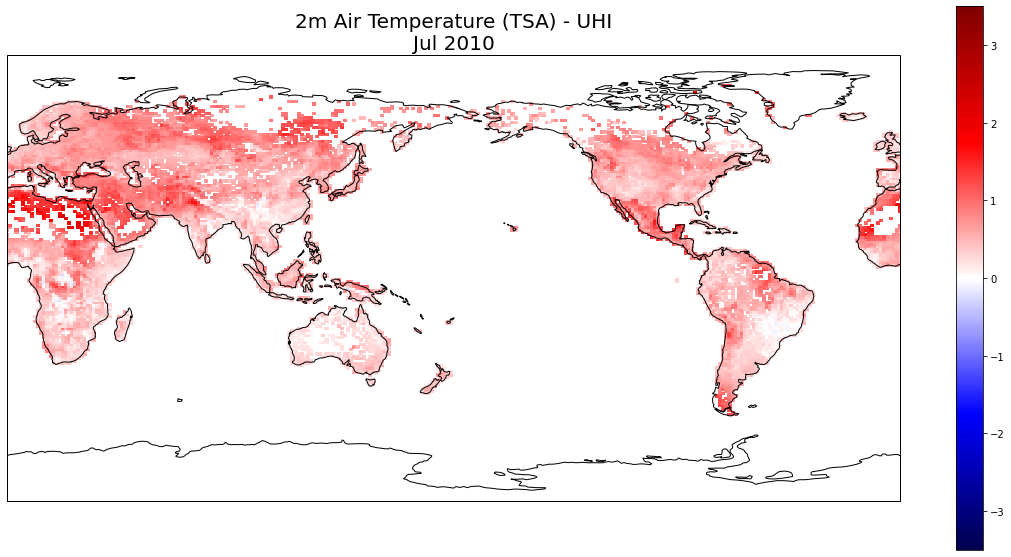

In [64]:
# 2m Air Temperature (TSA) - UHI - Jul 2010
# initiate class
TSA_UHI = UHI_Graphs('Practice_3.8.2020', 'clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-07.nc')

# import file as an xarray dataset 
nc = TSA_UHI.Open()

UHI_Graphs.Graph(TSA_UHI, nc, 'TSA_UHI', UHI=True, cmap='seismic', save=True, set_colorbar=True)

Variable?WBT
vmin?-3.5
vmax?3.5
Title?Wet Bulb Temperature (WBT) - UHI
Additional Notes?Jan 2010
Date?012010


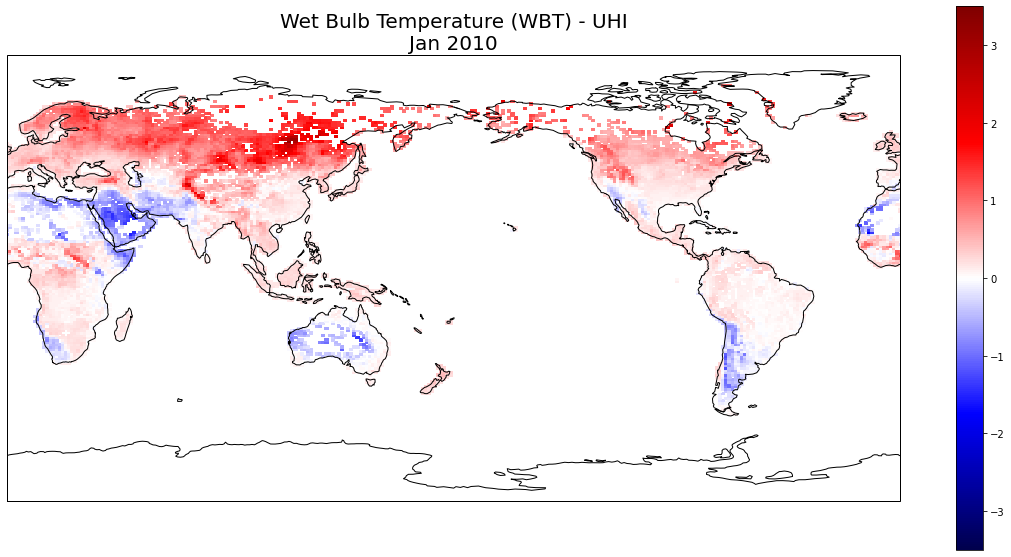

In [62]:
# Wet Bulb Temperature - UHI - Jan 2010
# initiate class
WBT_UHI = UHI_Graphs('Practice_3.8.2020', 'clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-01.nc')

# import file as an xarray dataset 
nc = WBT_UHI.Open()

UHI_Graphs.Graph(WBT_UHI, nc, 'WBT_UHI', UHI=True, cmap='seismic', save = True, set_colorbar=True)

Variable?WBT
vmin?-3.5
vmax?3.5
Title?Wet Bulb Temperature (WBT) - UHI
Additional Notes?Jul 2010
Date?072010


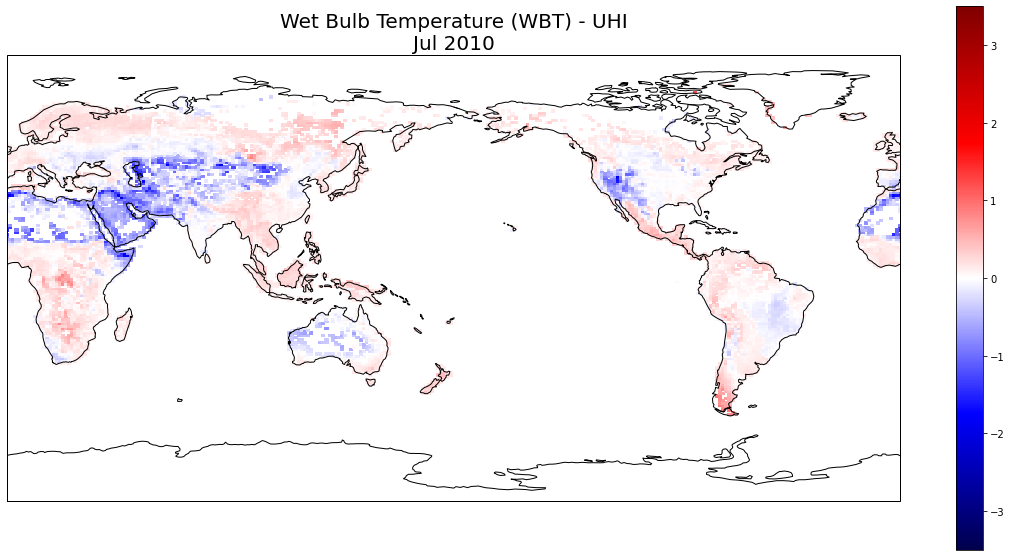

In [61]:
# Wet Bulb Temperature (WBT) - UHI - Jul 2010
# initiate class
WBT_UHI = UHI_Graphs('Practice_3.8.2020', 'clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-07.nc')

# import file as an xarray dataset 
nc = WBT_UHI.Open()

UHI_Graphs.Graph(WBT_UHI, nc, 'WBT_UHI', UHI=True, cmap='seismic', save = True, set_colorbar = True)

## To Do

make colorbars have more normal increments, not show so many sig figs 
wet bulb temperature 


difference between TSA and WBT = potential for temperature reduction 


## Old Code

Title?Wet Bulb Temperature - Urban 
Additional Notes?Jan 2010
Date?012010


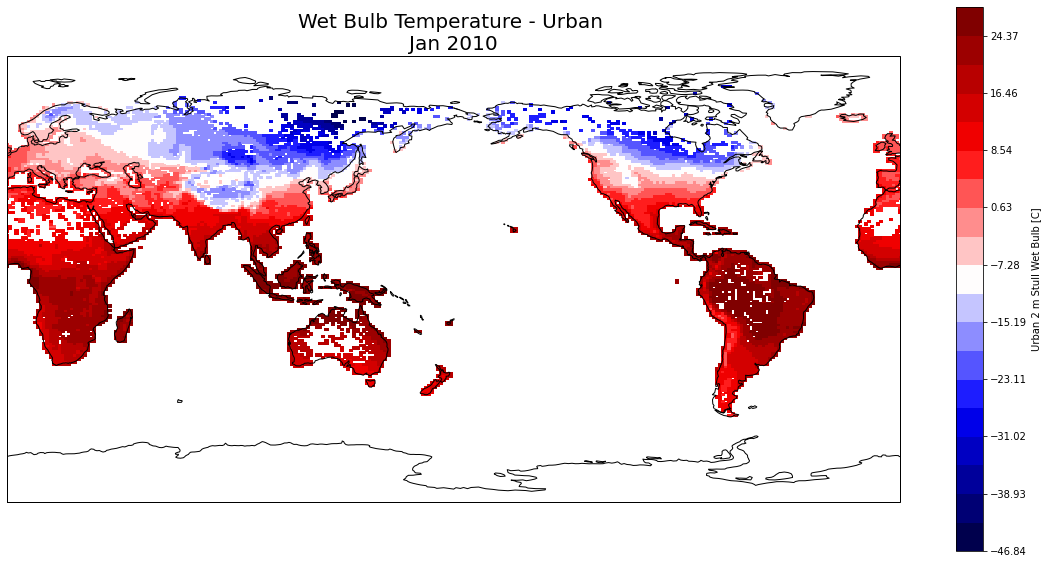

In [44]:
# Wet Bulb Temperature - Urban - Jan 2010
# initiate class
TSA_UHI = UHI_Graphs('Practice_3.8.2020', 'clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-01.nc')

# import file as an xarray dataset 
nc = TSA_UHI.Open()

UHI_Graphs.Graph(TSA_UHI, nc, 'WBT_U', UHI=False, cmap='seismic', save = False, set_colorbar=False)

In [18]:
# was checking that my data matches panoply 
nc['WBT_U'].sel(lat='5', lon='10.8377', method='nearest')

<xarray.DataArray 'WBT_U' (time: 1)>
array([17.689026], dtype=float32)
Coordinates:
  * time     (time) object 2010-02-01 00:00:00
    lon      float32 11.25
    lat      float32 5.183246
Attributes:
    long_name:     Urban 2 m Stull Wet Bulb
    units:         C
    cell_methods:  time: mean